## Linear Auto-Regression

In [ ]:
# importing relevant functions to aid in Linear Auto-Regression Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data preparation

extract the independent variables and format the data into the time series data needed

In [ ]:
# importing cleaned Quarterly Data
df = pd.read_csv("quarterly_perc.csv")
# extract only the GDP data
df_working = df.iloc[:,2:]
df_working

# time series train test split
# doing a 70-30 train test split
# 248 values, 174 train and 74 test

df_train = df_working.iloc[:174]
df_test = df_working.iloc[174:]


# Linear Auto-Regression Model

A linear auto-regression model is a time series forecasting model that predicts future values based on past values of the same variable, with the assumption that the current value of the series is a linear combination of its past values

In [ ]:
# Ensure df_train and df_test are DataFrames with a single column
# If they are Series, convert them to DataFrames
if isinstance(df_train, pd.Series):
    df_train = df_train.to_frame()
if isinstance(df_test, pd.Series):
    df_test = df_test.to_frame()

# Normalize the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# train_scaled = scaler.fit_transform(df_train)
# test_scaled = scaler.transform(df_test)

In [ ]:
collated_test_rmse= []

for j in range(1,20):

  # Define sequence length (e.g., 10 time steps)
  seq_length = j

  # Function to create sequences for Linear Regression
  def create_sequences(data, seq_length):
      X = []
      for i in range(len(data) - seq_length):
          X.append(data[i:i+seq_length])
      return np.array(X)

  def create_sequences_y(data, seq_length):
      y = []
      for i in range(len(data) - seq_length):
          y.append(data.iloc[i+seq_length,0])
      return np.array(y)

  # Create training testing sequences for y
  y_train = create_sequences_y(df_train, seq_length)
  y_test = create_sequences_y(df_test, seq_length)

  # Create training testing sequences for X
  gdp_train = create_sequences(df_train.iloc[:,0], seq_length)
  gdp_test = create_sequences(df_test.iloc[:,0], seq_length)
  consump_train = create_sequences(df_train.iloc[:,1], seq_length)
  consump_test = create_sequences(df_test.iloc[:,1], seq_length)
  invest_train = create_sequences(df_train.iloc[:,2], seq_length)
  invest_test = create_sequences(df_test.iloc[:,2], seq_length)
  govt_train = create_sequences(df_train.iloc[:,3], seq_length)
  govt_test = create_sequences(df_test.iloc[:,3], seq_length)
  exports_train = create_sequences(df_train.iloc[:,4], seq_length)
  exports_test = create_sequences(df_test.iloc[:,4], seq_length)
  imports_train = create_sequences(df_train.iloc[:,5], seq_length)
  imports_test = create_sequences(df_test.iloc[:,5], seq_length)
  vix_train = create_sequences(df_train.iloc[:,6], seq_length)
  vix_test = create_sequences(df_test.iloc[:,6], seq_length)
  sp500_train = create_sequences(df_train.iloc[:,7], seq_length)
  sp500_test = create_sequences(df_test.iloc[:,7], seq_length)
  umc_train = create_sequences(df_train.iloc[:,8], seq_length)
  umc_test = create_sequences(df_test.iloc[:,8], seq_length)
  inflation_train = create_sequences(df_train.iloc[:,9], seq_length)
  inflation_test = create_sequences(df_test.iloc[:,9], seq_length)
  nominal_train = create_sequences(df_train.iloc[:,10], seq_length)
  nominal_test = create_sequences(df_test.iloc[:,10], seq_length)
  real_train = create_sequences(df_train.iloc[:,11], seq_length)
  real_test = create_sequences(df_test.iloc[:,11], seq_length)

  X_train = np.hstack([gdp_train,consump_train,invest_train,govt_train,exports_train,imports_train,vix_train,sp500_train,umc_train,inflation_train,nominal_train,real_train])
  X_test = np.hstack([gdp_test,consump_test,invest_test,govt_test,exports_test,imports_test,vix_test,sp500_test,umc_test,inflation_test,nominal_test,real_test])

  # Initialize and train the Linear Regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Predict on the test set
  y_pred = model.predict(X_test)
  y_test = np.array(df_test[:])

  # Model performance metrics
  mae = mean_absolute_error(y_test[seq_length:,0], y_pred)
  mse = mean_squared_error(y_test[seq_length:,0], y_pred)
  rmse = np.sqrt(mse)

  print(f'Mean Absolute Error: {mae:.5f}')
  print(f'Mean Squared Error: {mse:.5f}')
  print(f'Root Mean Squared Error: {rmse:.5f}')

  collated_test_rmse.append(rmse)

print(f'Collated Root Mean Squared Error: {collated_test_rmse}')

Mean Absolute Error: 1.01463
Mean Squared Error: 7.58415
Root Mean Squared Error: 2.75393
Mean Absolute Error: 1.16417
Mean Squared Error: 8.16925
Root Mean Squared Error: 2.85819
Mean Absolute Error: 1.77921
Mean Squared Error: 22.77880
Root Mean Squared Error: 4.77271
Mean Absolute Error: 2.31126
Mean Squared Error: 45.22667
Root Mean Squared Error: 6.72508
Mean Absolute Error: 3.08957
Mean Squared Error: 59.90513
Root Mean Squared Error: 7.73984
Mean Absolute Error: 4.19458
Mean Squared Error: 94.66089
Root Mean Squared Error: 9.72938
Mean Absolute Error: 6.21216
Mean Squared Error: 227.84327
Root Mean Squared Error: 15.09448
Mean Absolute Error: 6.27631
Mean Squared Error: 194.92433
Root Mean Squared Error: 13.96153
Mean Absolute Error: 7.99121
Mean Squared Error: 365.94965
Root Mean Squared Error: 19.12981
Mean Absolute Error: 9.74905
Mean Squared Error: 482.71836
Root Mean Squared Error: 21.97085
Mean Absolute Error: 16.43401
Mean Squared Error: 1329.92286
Root Mean Squared Error

from this we can tell that the sequence of 1 achieves the lowest RMSE

In [ ]:
# Assuming df_train and df_test are your training and testing DataFrames
# Example: df_train and df_test have a single column 'GDP' with GDP values
# df_train = pd.read_csv('train.csv')  # Replace with your data loading method
# df_test = pd.read_csv('test.csv')    # Replace with your data loading method

# Define sequence length
seq_length = 1

# Function to create sequences for Linear Regression
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

def create_sequences_y(data, seq_length):
    y = []
    for i in range(len(data) - seq_length):
        y.append(data.iloc[i+seq_length,0])
    return np.array(y)

# Create training testing sequences for y
y_train = create_sequences_y(df_train, seq_length)
y_test = create_sequences_y(df_test, seq_length)

# Create training testing sequences for X
gdp_train = create_sequences(df_train.iloc[:,0], seq_length)
gdp_test = create_sequences(df_test.iloc[:,0], seq_length)
consump_train = create_sequences(df_train.iloc[:,1], seq_length)
consump_test = create_sequences(df_test.iloc[:,1], seq_length)
invest_train = create_sequences(df_train.iloc[:,2], seq_length)
invest_test = create_sequences(df_test.iloc[:,2], seq_length)
govt_train = create_sequences(df_train.iloc[:,3], seq_length)
govt_test = create_sequences(df_test.iloc[:,3], seq_length)
exports_train = create_sequences(df_train.iloc[:,4], seq_length)
exports_test = create_sequences(df_test.iloc[:,4], seq_length)
imports_train = create_sequences(df_train.iloc[:,5], seq_length)
imports_test = create_sequences(df_test.iloc[:,5], seq_length)
vix_train = create_sequences(df_train.iloc[:,6], seq_length)
vix_test = create_sequences(df_test.iloc[:,6], seq_length)
sp500_train = create_sequences(df_train.iloc[:,7], seq_length)
sp500_test = create_sequences(df_test.iloc[:,7], seq_length)
umc_train = create_sequences(df_train.iloc[:,8], seq_length)
umc_test = create_sequences(df_test.iloc[:,8], seq_length)
inflation_train = create_sequences(df_train.iloc[:,9], seq_length)
inflation_test = create_sequences(df_test.iloc[:,9], seq_length)
nominal_train = create_sequences(df_train.iloc[:,10], seq_length)
nominal_test = create_sequences(df_test.iloc[:,10], seq_length)
real_train = create_sequences(df_train.iloc[:,11], seq_length)
real_test = create_sequences(df_test.iloc[:,11], seq_length)

X_train = np.hstack([gdp_train,consump_train,invest_train,govt_train,exports_train,imports_train,vix_train,sp500_train,umc_train,inflation_train,nominal_train,real_train])
X_test = np.hstack([gdp_test,consump_test,invest_test,govt_test,exports_test,imports_test,vix_test,sp500_test,umc_test,inflation_test,nominal_test,real_test])


# Running Linear Auto-Regression using sequence value of 1

<ipython-input-37-a900a422da82>:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'r--', label='y = 0', color='black')


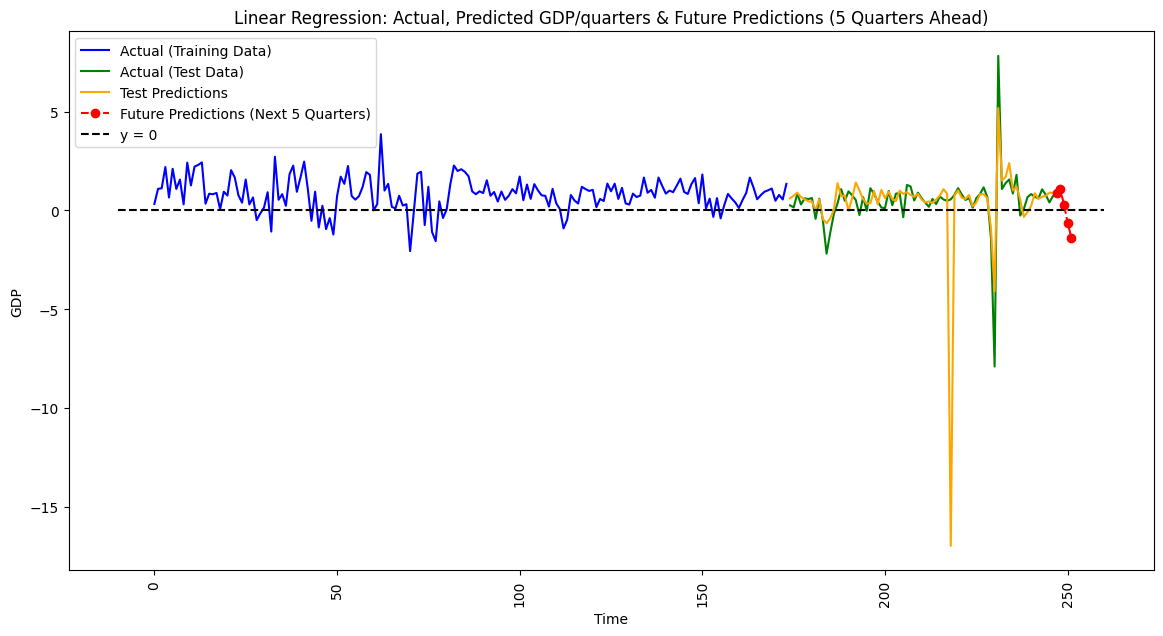

Mean Absolute Error: 1.01463
Mean Squared Error: 7.58415
Root Mean Squared Error: 2.75393


In [ ]:
window = 1

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_test = np.array(df_test[:])

# Starting from the most recent sequence in the test set
last_sequence = X_test[-1].reshape((1, -1))  # Flatten the last test sequence
future_predictions = []

# Loop to predict the next 5 quarters
for _ in range(5):
    # Make the prediction for the next quarter
    next_prediction = model.predict(last_sequence)
    future_predictions.append(next_prediction[0])

    # Update last_sequence by appending the prediction and removing the oldest value
    last_sequence = np.append(last_sequence[:, 1:], next_prediction.reshape(1, 1), axis=1)

# Convert predictions into a NumPy array
future_predictions = np.array(future_predictions)

# Plot the actual and predicted values (both for training and test data)
plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(df_train.index, df_train.iloc[:,0], label='Actual (Training Data)', color='blue')

# Plot the actual test data
plt.plot(df_test.index, y_test[:,0], label='Actual (Test Data)', color='green')

# Plot test predictions
plt.plot(range(len(y_train)+window, len(y_train) + len(y_test)), y_pred, label="Test Predictions", color='orange')

# Plot future predictions
future_x = np.arange(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(future_predictions))
plt.plot(future_x, future_predictions, label="Future Predictions (Next 5 Quarters)", color='red', linestyle='dashed', marker='o')

# Plot y=0
x = np.linspace(-10, 260, 100)
y = np.zeros_like(x)
plt.plot(x, y, 'r--', label='y = 0', color='black')

# Labels and title
plt.title('Linear Regression: Actual, Predicted GDP/quarters & Future Predictions (5 Quarters Ahead)')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.show()

# Model performance metrics
r2 = r2_score(y_test[window:,0], y_pred)
mae = mean_absolute_error(y_test[seq_length:,0], y_pred)
mse = mean_squared_error(y_test[seq_length:,0], y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.5f}')
print(f'Mean Squared Error: {mse:.5f}')
print(f'Root Mean Squared Error: {rmse:.5f}')

In [ ]:
weights = model.coef_
print("model weights:", weights)

model weights: [ 1.47161625e-01  3.20791658e-01 -3.47457586e-02 -1.21387046e-01
 -2.91966786e-02  8.27679849e-02 -2.65005026e-03  3.04702372e-02
 -5.24211158e-03  9.95378977e-05 -1.55842350e-03  7.82466355e-04]


## LSTM

# Data preparation

extract the independent variables and format the data into the time series data needed

In [ ]:
import pandas as pd

df = pd.read_csv("quarterly_perc.csv")

# extract only the GDP data
df_working = df.iloc[:,2:]
df_working

,gdp_change,consump_change,invest_change,govt_change,exports_change,imports_change,vix_change,sp500_change,umc_senti_change,inflation_change,nominal_int_change,real_int_change
0,0.329402,1.414944,-2.925825,0.693074,-3.234702,1.222095,7.120617,3.089573,3.711790,-15.697455,2.690835,4.798808
1,1.092090,0.700486,5.261525,-1.354500,1.518745,-2.314435,-29.099762,9.952413,3.578947,31.605300,1.484624,-1.307463
2,1.122414,0.943647,1.590674,0.074623,7.993618,2.354289,-11.791203,6.285278,-6.808943,-41.654175,-0.114605,5.016682
3,2.198831,1.356577,3.078791,4.438641,-0.500513,2.538714,7.939488,1.861203,5.125409,229.247194,12.374717,-2.540037
4,0.655905,0.833300,1.214218,-1.033565,3.908221,-0.327593,39.328535,3.250257,-2.074689,-55.654126,3.702703,17.450727
...,...,...,...,...,...,...,...,...,...,...,...,...
243,1.071523,0.631372,2.433647,1.391539,1.197286,1.143789,-8.746418,6.037654,11.717496,12.578834,5.410822,4.042180
244,0.788673,0.860706,0.177755,0.897113,1.511977,1.037426,1.981759,0.298851,-6.752874,-20.261047,1.330798,5.649267
245,0.404802,0.478412,0.887667,0.439143,0.475545,1.500419,-10.689178,11.805352,20.801233,39.067575,0.000000,-5.908110
246,0.738980,0.696222,2.023811,0.754453,0.257528,1.840029,2.354089,5.098766,-8.801020,-25.608886,0.000000,5.722634


In [ ]:
# time series train test split
# doing a 70-30 train test split
# 248 values, 174 train and 74 test

df_train = df_working.iloc[:174]
df_test = df_working.iloc[174:]

# LSTM model

A Long short-term memory (LSTM) is a type of Recurrent Neural Network specially designed to prevent the neural network output for a given input from either decaying or exploding as it cycles through the feedback loops.

In [ ]:
# Ensure df_train and df_test are DataFrames with a single column
# If they are Series, convert them to DataFrames
if isinstance(df_train, pd.Series):
    df_train = df_train.to_frame()
if isinstance(df_test, pd.Series):
    df_test = df_test.to_frame()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

test_RMSE_collated = []

# iterate through for different sequence lengths to find the best amount
for i in range (5,20):

  # Define sequence length
  seq_length = i

  # Function to create sequences for LSTM
  def create_sequences(data, seq_length):
      X = []
      for j in range(len(data) - seq_length):
          X.append(data[j:j+seq_length])
      return np.array(X)

  def create_sequences_y(data, seq_length):
      y = []
      for j in range(len(data) - seq_length):
          y.append(data.iloc[j+seq_length,0])
      return np.array(y)


  # Create training testing sequences for y
  y_train = create_sequences_y(df_train, seq_length)
  y_test = create_sequences_y(df_test, seq_length)

  # Create training testing sequences for X
  gdp_train = create_sequences(df_train.iloc[:,0], seq_length)
  gdp_test = create_sequences(df_test.iloc[:,0], seq_length)
  consump_train = create_sequences(df_train.iloc[:,1], seq_length)
  consump_test = create_sequences(df_test.iloc[:,1], seq_length)
  invest_train = create_sequences(df_train.iloc[:,2], seq_length)
  invest_test = create_sequences(df_test.iloc[:,2], seq_length)
  govt_train = create_sequences(df_train.iloc[:,3], seq_length)
  govt_test = create_sequences(df_test.iloc[:,3], seq_length)
  exports_train = create_sequences(df_train.iloc[:,4], seq_length)
  exports_test = create_sequences(df_test.iloc[:,4], seq_length)
  imports_train = create_sequences(df_train.iloc[:,5], seq_length)
  imports_test = create_sequences(df_test.iloc[:,5], seq_length)
  vix_train = create_sequences(df_train.iloc[:,6], seq_length)
  vix_test = create_sequences(df_test.iloc[:,6], seq_length)
  sp500_train = create_sequences(df_train.iloc[:,7], seq_length)
  sp500_test = create_sequences(df_test.iloc[:,7], seq_length)
  umc_train = create_sequences(df_train.iloc[:,8], seq_length)
  umc_test = create_sequences(df_test.iloc[:,8], seq_length)
  inflation_train = create_sequences(df_train.iloc[:,9], seq_length)
  inflation_test = create_sequences(df_test.iloc[:,9], seq_length)
  nominal_train = create_sequences(df_train.iloc[:,10], seq_length)
  nominal_test = create_sequences(df_test.iloc[:,10], seq_length)
  real_train = create_sequences(df_train.iloc[:,11], seq_length)
  real_test = create_sequences(df_test.iloc[:,11], seq_length)

  X_train = np.hstack([gdp_train,consump_train,invest_train,govt_train,exports_train,imports_train,vix_train,sp500_train,umc_train,inflation_train,nominal_train,real_train])
  X_test = np.hstack([gdp_test,consump_test,invest_test,govt_test,exports_test,imports_test,vix_test,sp500_test,umc_test,inflation_test,nominal_test,real_test])

  # Reshape input to be [samples, time steps, features]
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1))) # 50 LSTM units
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # Train the model
  model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

  # Make predictions
  train_predictions = model.predict(X_train)
  test_predictions = model.predict(X_test)

  # Evaluate the model using rmse
  from sklearn.metrics import mean_squared_error
  train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

  print(f"Window: {i}")
  print(f"Train RMSE: {train_rmse}")
  print(f"Test RMSE: {test_rmse}")

  test_RMSE_collated.append(test_rmse)

print(f"Collated Test RMSE: {test_RMSE_collated}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9.5342 
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2214
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.8976
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5171
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2154
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0535
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8025
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8262
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6866
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5664
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6248
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7891
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6255
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6144
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5879
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 91.5330
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 41.3304
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 17.4947
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.5128
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24.6731
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.9380
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9737
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 20.7044
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.7833
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.8807
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.1351
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.0802
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 16.3555
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.4199
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8864
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 534.6136
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 113.7880
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 118.6286
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 42.0083
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 85.1418
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 57.7021
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 66.7917
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 57.6670
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 61.1131
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 41.9088
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.2475
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 18.8974
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 31.7016
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 31.8549
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.6157
Epoch 16/50
6/6 ━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 215.1878
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 12.9602
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.9049
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.1988
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.1060
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.5210
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.2405
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.6430
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3548
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3638
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.1898
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9656
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0701
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8838
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.9472
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 7.5141
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.1671
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4.8593
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9156
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.7777
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3647
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1657
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.1695
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9629
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7739
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6783
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7021
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6225
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4978
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5970
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 99.7590
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 25.3265
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 16.0625
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 13.6296
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.6599
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 11.6688
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 5.3213
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.5846
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.2626
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.0210
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.3782
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.4551
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4628
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.0333
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 2.7029
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 103.0539
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2076.7905
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1938.5779
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 345.7165
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 337.8558
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 865.9288
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 472.8923
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 376.0194
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 530.0987
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 390.8167
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 1011.6651
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 488.6245
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 333.2329
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 230.7662
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 428.3529
Epoch 16/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 57.2128
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.6466
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 16.4702
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.3846
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.4224
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.0230
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.8804
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.2084
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.1558
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.2927
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.5424
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.2688
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 3.8461
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.0778
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 2.4467
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 9.7010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 6.5461
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 282.7090
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 4.3902
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 4.7386
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.8000
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.6486
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.8391
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.5537
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.0822
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.1769
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.1903
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.3434
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.0575
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.1076
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 6327.0103
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 249.8965
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 425.9220
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 77.1690
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 130.6755
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 315.5273
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 120.1204
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 115.9023
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 72.5267
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 46.2497
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 70.9552
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 31.8779
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 36.5255
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 26.2835
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 25.2201
Epoch 16/50
5/5 ━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 618.9602
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 215.3420
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 81.2554
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 33.0924
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 30.2211
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 19.6625
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 33.3209
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 41.4394
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 25.6259
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.1025
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 28.0124
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 16.4174
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.5408
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 21.8664
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 18.6494
Epoch 16/50
5/5 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 112.5999
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 657.1929
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 449.1652
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 621.0405
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 228.4985
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 143.4480
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 204.1517
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 129.9022
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 138.9266
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 82.1829
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 77.9112
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 86.7744
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 111.1327
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 93.5309
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 73.8578
Epoch 16/50
5/5 ━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Window: 16
Train RMSE: 4.002340591259773
Test RMSE: 70.22466735310559
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 4.6570
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 5.8731
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 2.9497
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3.0233
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 5.7358
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 92.4816
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2.2300
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.8139
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.2618
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.6813
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.6836
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.1660
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.5100
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 1.1452
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.9861
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 9.4128
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2.3711
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 119.6524
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.8570
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.8416
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.4782
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6913
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.7260
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.5980
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.6054
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.6410
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.6522
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.5687
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.6248
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6686
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 2081.5649
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 12.0639
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 38.3333
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 49.9507
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 60.0510
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 48.7437
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 40.0176
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 29.1374
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 15.6420
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 20.7287
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 17.3078
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 17.9780
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 15.2741
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 15.6367
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 168.0568
Epoch 16/50
5/5 ━━━━━━━━

from this we can tell that the sequence of 16 achieves the lowest rmse, albeit not as low an rmse as compared to linear auto-regression

## Running LTSE using sequence value of 16


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define sequence length
seq_length = 16

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

def create_sequences_y(data, seq_length):
    y = []
    for i in range(len(data) - seq_length):
        y.append(data.iloc[i+seq_length,0])
    return np.array(y)


# Create training testing sequences for y
y_train = create_sequences_y(df_train, seq_length)
y_test = create_sequences_y(df_test, seq_length)

# Create training testing sequences for X
gdp_train = create_sequences(df_train.iloc[:,0], seq_length)
gdp_test = create_sequences(df_test.iloc[:,0], seq_length)
consump_train = create_sequences(df_train.iloc[:,1], seq_length)
consump_test = create_sequences(df_test.iloc[:,1], seq_length)
invest_train = create_sequences(df_train.iloc[:,2], seq_length)
invest_test = create_sequences(df_test.iloc[:,2], seq_length)
govt_train = create_sequences(df_train.iloc[:,3], seq_length)
govt_test = create_sequences(df_test.iloc[:,3], seq_length)
exports_train = create_sequences(df_train.iloc[:,4], seq_length)
exports_test = create_sequences(df_test.iloc[:,4], seq_length)
imports_train = create_sequences(df_train.iloc[:,5], seq_length)
imports_test = create_sequences(df_test.iloc[:,5], seq_length)
vix_train = create_sequences(df_train.iloc[:,6], seq_length)
vix_test = create_sequences(df_test.iloc[:,6], seq_length)
sp500_train = create_sequences(df_train.iloc[:,7], seq_length)
sp500_test = create_sequences(df_test.iloc[:,7], seq_length)
umc_train = create_sequences(df_train.iloc[:,8], seq_length)
umc_test = create_sequences(df_test.iloc[:,8], seq_length)
inflation_train = create_sequences(df_train.iloc[:,9], seq_length)
inflation_test = create_sequences(df_test.iloc[:,9], seq_length)
nominal_train = create_sequences(df_train.iloc[:,10], seq_length)
nominal_test = create_sequences(df_test.iloc[:,10], seq_length)
real_train = create_sequences(df_train.iloc[:,11], seq_length)
real_test = create_sequences(df_test.iloc[:,11], seq_length)

In [ ]:
X_train = np.hstack([gdp_train,consump_train,invest_train,govt_train,exports_train,imports_train,vix_train,sp500_train,umc_train,inflation_train,nominal_train,real_train])
X_test = np.hstack([gdp_test,consump_test,invest_test,govt_test,exports_test,imports_test,vix_test,sp500_test,umc_test,inflation_test,nominal_test,real_test])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input to be [samples, time steps, features] (required for LSTM)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))  # 50 LSTM units
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Predict future GDP values
future_steps = 5  # Number of future steps to predict
last_sequence = X_test[-1]  # Last sequence from the test data
future_predictions = []

for _ in range(future_steps):
    next_prediction = model.predict(last_sequence.reshape(1, 192, 1))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction).reshape(192, 1)

print("Future GDP Predictions:")
print(future_predictions)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 28786526.0000
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 39577676.0000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1530757.1250
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 3200617.2500
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 20628240.0000
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1053601.7500
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1028607.5000
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 448171.9688
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1145857.1250
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 383236.6875
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 144619.3594
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 394958.9375
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 63832.8477
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 350099.3750
Epoch 15/100
5/5 

<ipython-input-32-1b84e97c8a4d>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'r--', label='y = 0', color='black')


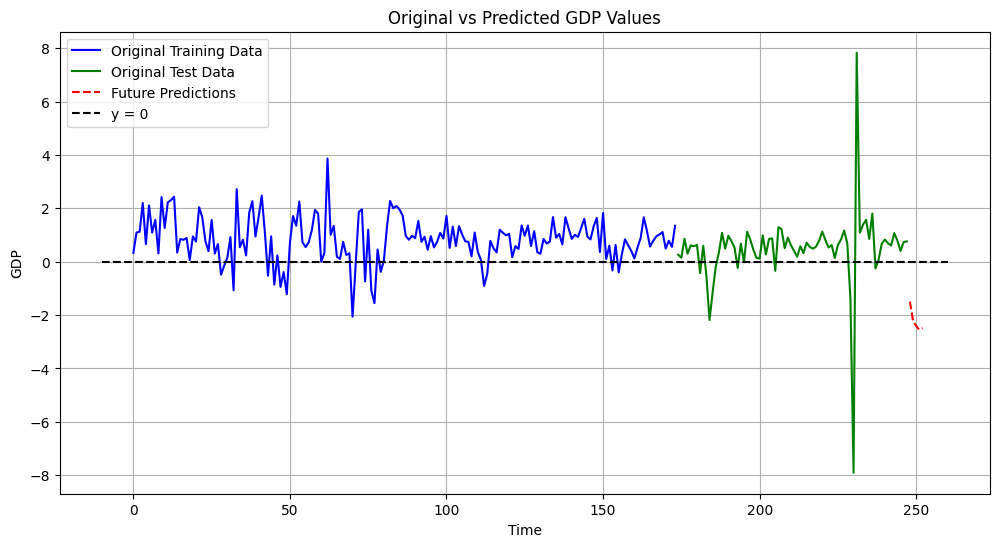

In [ ]:
import matplotlib.pyplot as plt

train_original = df_train.iloc[:,0]

# Original test data
test_original = df_test.iloc[:,0]

# Create a time axis for plotting
time_train = np.arange(len(train_original))
time_test = np.arange(len(train_original), len(train_original) + len(test_original))
time_future = np.arange(len(train_original) + len(test_original), len(train_original) + len(test_original) + future_steps)

# Plot the original training data
plt.figure(figsize=(12, 6))
plt.plot(time_train, train_original, label='Original Training Data', color='blue')

# Plot the original test data
plt.plot(time_test, test_original, label='Original Test Data', color='green')

# Plot the future predictions
plt.plot(time_future, future_predictions, label='Future Predictions', color='red', linestyle='--')

# Plot y=0
x = np.linspace(-10, 260, 100)
y = np.zeros_like(x)
plt.plot(x, y, 'r--', label='y = 0', color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Original vs Predicted GDP Values')
plt.legend()
plt.grid(True)
plt.show()